In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


<AxesSubplot:>

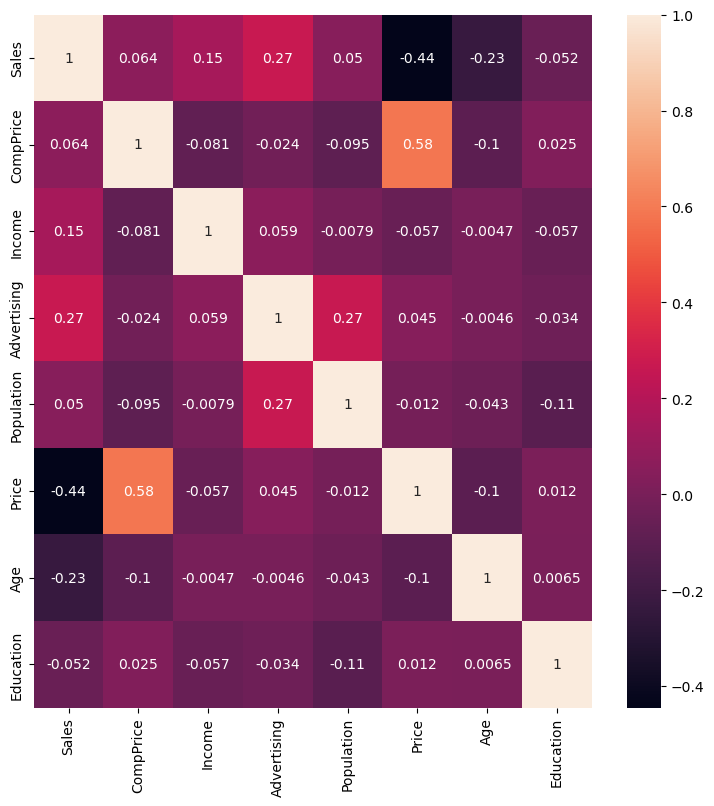

In [6]:
plt.figure(figsize=[9,9])
sns.heatmap(df.corr(), annot=True)

In [7]:
#divide the data based on mean sales valuse 
df.Sales.mean()

7.496325

In [8]:
df.Sales = [1 if i >= df.Sales.mean() else 0 for i in df.Sales]
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1,111,48,16,260,83,Good,65,10,Yes,Yes
2,1,113,35,10,269,80,Medium,59,12,Yes,Yes
3,0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,Good,33,14,Yes,Yes
396,0,139,23,3,37,120,Medium,55,11,No,Yes
397,0,162,26,12,368,159,Medium,40,18,Yes,Yes
398,0,100,79,7,284,95,Bad,50,12,Yes,Yes


<AxesSubplot:xlabel='US', ylabel='count'>

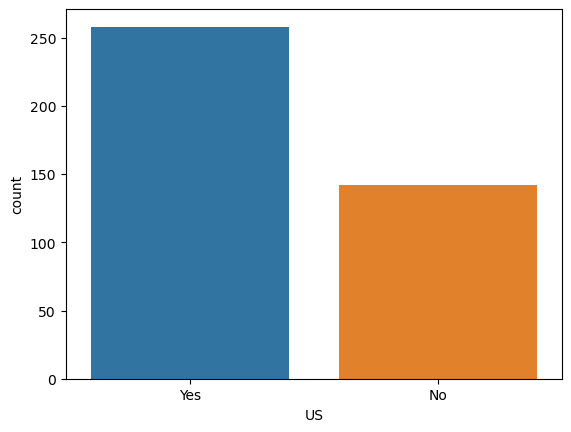

In [9]:
sns.countplot(x=df['US'])

<AxesSubplot:xlabel='Urban', ylabel='count'>

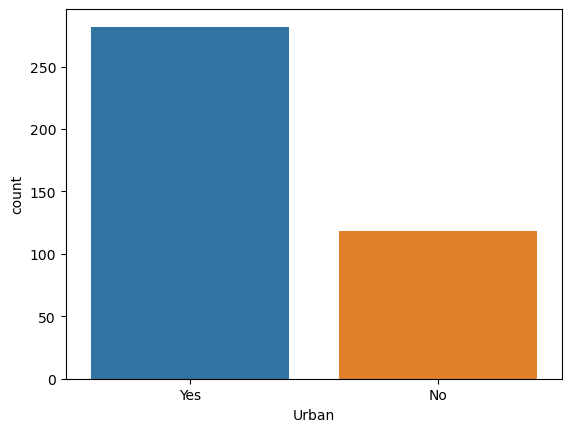

In [10]:
sns.countplot(x=df['Urban'])

<AxesSubplot:xlabel='ShelveLoc', ylabel='count'>

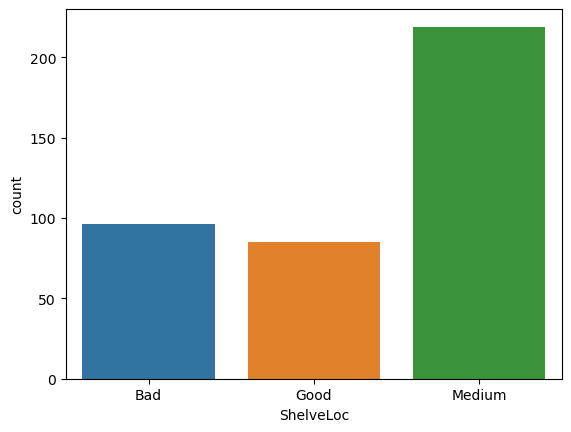

In [11]:
sns.countplot(x=df['ShelveLoc'])

In [12]:
#preprocessing the categorical variable
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
df['ShelveLoc']=LE.fit_transform(df['ShelveLoc'])
df['Urban']=LE.fit_transform(df['Urban'])
df['US']=LE.fit_transform(df['US'])

In [13]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,1,33,14,1,1
396,0,139,23,3,37,120,2,55,11,0,1
397,0,162,26,12,368,159,2,40,18,1,1
398,0,100,79,7,284,95,0,50,12,1,1


In [14]:
#data cleaning ,removing an outliers
from sklearn.ensemble import IsolationForest

# training the model
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(df)

IsolationForest(contamination=0.01, random_state=10)

In [15]:
#predictions
y_pred_outliers = clf.predict(df)
y_pred_outliers  

array([ 1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [16]:
df['Outliers']=y_pred_outliers
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Outliers
0,1,138,73,11,276,120,0,42,17,1,1,1
1,1,111,48,16,260,83,1,65,10,1,1,1
2,1,113,35,10,269,80,2,59,12,1,1,1
3,0,117,100,4,466,97,2,55,14,1,1,1
4,0,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,1,33,14,1,1,1
396,0,139,23,3,37,120,2,55,11,0,1,1
397,0,162,26,12,368,159,2,40,18,1,1,1
398,0,100,79,7,284,95,0,50,12,1,1,1


In [17]:
df[df.Outliers==-1] # Number of Outliers are 4

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Outliers
5,1,124,113,13,501,72,0,78,16,0,1,-1
42,1,77,69,0,25,24,2,50,18,1,0,-1
75,1,88,111,23,480,92,0,36,16,0,1,-1
208,1,86,54,0,497,64,0,33,12,1,0,-1


In [18]:
data= df.drop(df.index[[5,42,75,208]],axis=0).reset_index()
data

,index,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Outliers
0,0,1,138,73,11,276,120,0,42,17,1,1,1
1,1,1,111,48,16,260,83,1,65,10,1,1,1
2,2,1,113,35,10,269,80,2,59,12,1,1,1
3,3,0,117,100,4,466,97,2,55,14,1,1,1
4,4,0,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,395,1,138,108,17,203,128,1,33,14,1,1,1
392,396,0,139,23,3,37,120,2,55,11,0,1,1
393,397,0,162,26,12,368,159,2,40,18,1,1,1
394,398,0,100,79,7,284,95,0,50,12,1,1,1


In [19]:
#remove extra columns
data=data.drop(['Outliers','index'],axis=1)
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
391,1,138,108,17,203,128,1,33,14,1,1
392,0,139,23,3,37,120,2,55,11,0,1
393,0,162,26,12,368,159,2,40,18,1,1
394,0,100,79,7,284,95,0,50,12,1,1


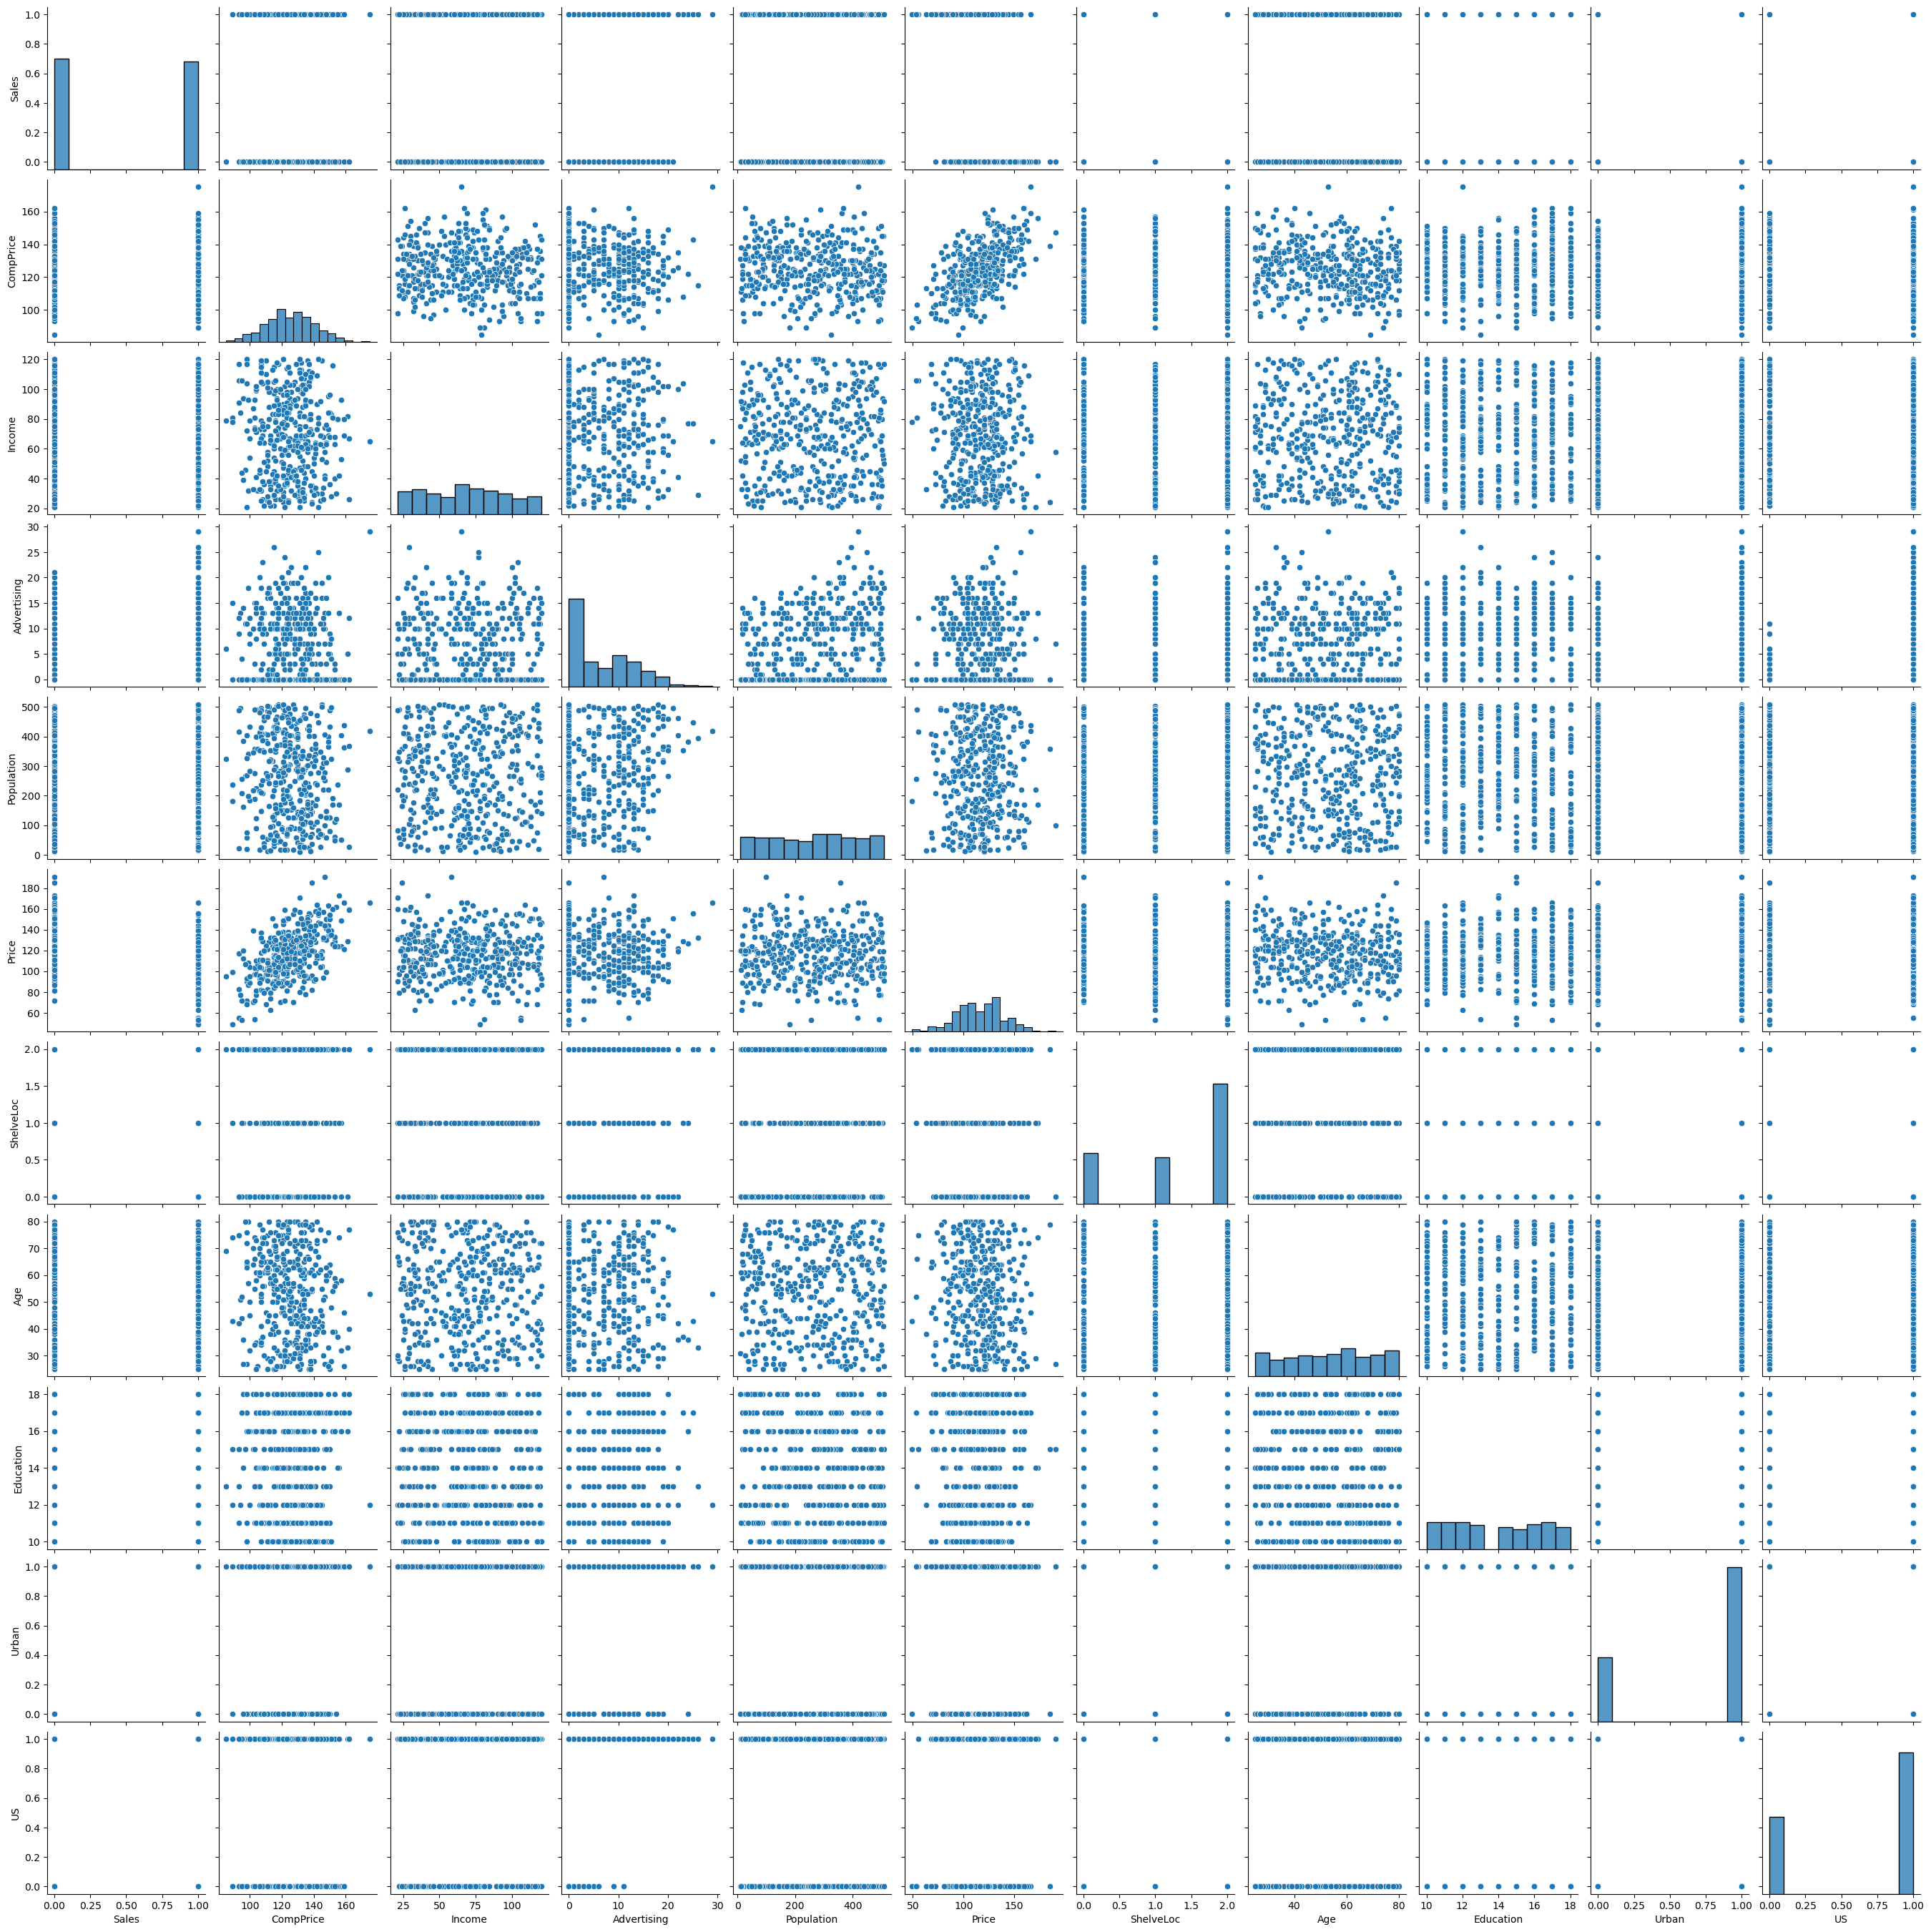

In [20]:
sns.pairplot(data)  

<AxesSubplot:xlabel='Age', ylabel='count'>

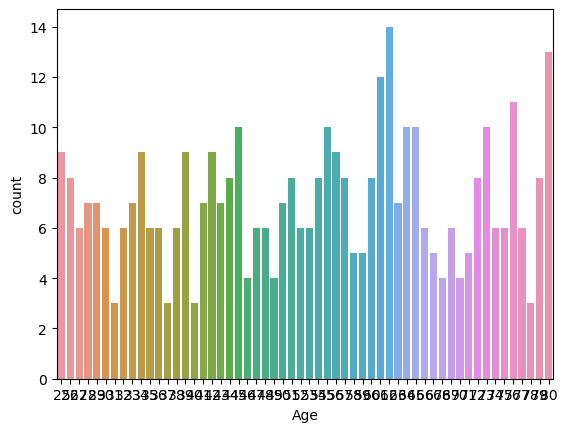

In [21]:


sns.countplot(x=data['Age'])



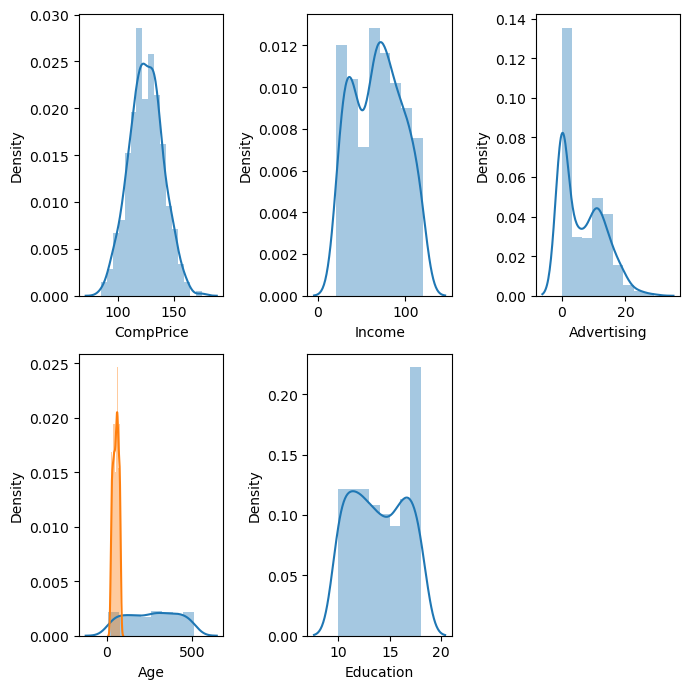

In [22]:
plt.figure(figsize=[7,7])
plt.subplot(2,3,1)
sns.distplot(data['CompPrice'])

plt.subplot(2,3,2)
sns.distplot(data['Income'])

plt.subplot(2,3,3)
sns.distplot(data['Advertising'])

plt.subplot(2,3,4)
sns.distplot(data['Population'])

plt.subplot(2,3,4)
sns.distplot(data['Age'])

plt.subplot(2,3,5)
sns.distplot(data['Education'])

plt.tight_layout()

<AxesSubplot:xlabel='Sales', ylabel='count'>

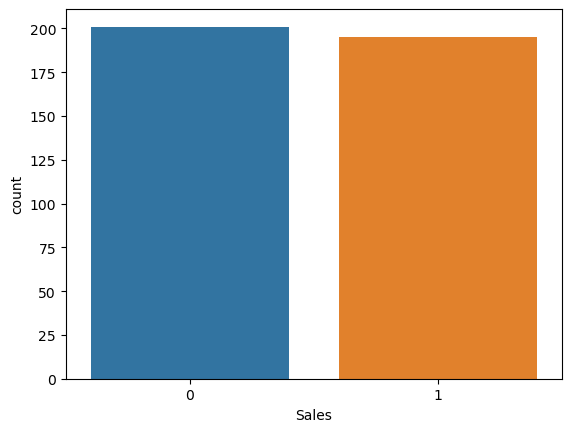

In [23]:
sns.countplot(x=data["Sales"])

In [24]:
#dividing data
x=df.iloc[:,1:]
y=df.iloc[:,0]

#standerization
from sklearn.preprocessing import MinMaxScaler
MM=MinMaxScaler()
MM_x=MM.fit_transform(x)

#split data into train test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(MM_x,y,test_size=0.3,random_state=40)

#by using entropy
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier(criterion='entropy',max_depth=3)

DT.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

#Y_pred_train= DT.predict(x_train)
Y_pred_test= DT.predict(x_test)               #predicting on test data

pd.Series(Y_pred_test).value_counts() # getting the count of each category 



1    78
0    42
dtype: int64

In [25]:
Y_pred_test

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [26]:
DT.score(x_test, y_test)

0.65

In [27]:
np.mean(Y_pred_test==y_test)

0.65

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
cm=confusion_matrix(y_test,Y_pred_test)
cm

array([[34, 34],
       [ 8, 44]], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score

ac = accuracy_score(y_test, Y_pred_test)
print("Accuracy score:", round(ac, 2))


Accuracy score: 0.65


In [30]:
print(classification_report(y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.50      0.62        68
           1       0.56      0.85      0.68        52

    accuracy                           0.65       120
   macro avg       0.69      0.67      0.65       120
weighted avg       0.70      0.65      0.64       120



In [31]:
from sklearn.model_selection import GridSearchCV
tree_param = [{'criterion': ['entropy', 'gini'], 'max_depth': np.arange(3, 150)}]
model1= DecisionTreeClassifier()
estimator = model1

clf = GridSearchCV(estimator,tree_param, cv=10)
clf.fit(MM_x,y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': array([  3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149])}])

In [32]:
print(clf.best_score_)
print(clf.best_params_)

0.75
{'criterion': 'gini', 'max_depth': 43}


In [33]:
tree_param1 = [{'min_samples_split':[2,3,4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120,150],'min_samples_leaf':[2,3,4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120,150]}]
clf2= GridSearchCV(estimator,tree_param1, cv=10)
clf2.fit(MM_x,y)
print(clf2.best_score_)
print(clf2.best_params_)

0.75
{'min_samples_leaf': 4, 'min_samples_split': 3}


In [34]:
clf.best_params_,clf2.best_params_

({'criterion': 'gini', 'max_depth': 43},
 {'min_samples_leaf': 4, 'min_samples_split': 3})

In [35]:
# modified model 
model_CV = DecisionTreeClassifier(criterion = 'gini',max_depth=80,min_samples_leaf=4, min_samples_split= 5)
model_CV.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=80, min_samples_leaf=4, min_samples_split=5)

In [36]:
#Predicting on test data
pred1= model_CV.predict(x_test) # predicting on test data set 
pd.Series(pred1).value_counts() # getting the count of each category

0    76
1    44
dtype: int64

In [37]:
acc1 = accuracy_score(y_test, pred1) * 100
print("Accuracy =", acc1)
confusion_matrix(y_test, pred1)

Accuracy = 73.33333333333333


array([[56, 12],
       [20, 32]], dtype=int64)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78        68
           1       0.73      0.62      0.67        52

    accuracy                           0.73       120
   macro avg       0.73      0.72      0.72       120
weighted avg       0.73      0.73      0.73       120



In [39]:
#using gini model
model_CV1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=80,min_samples_leaf=4, min_samples_split=5)
model_CV1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=80, min_samples_leaf=4,
                       min_samples_split=5)

In [40]:
pred2=model_CV1.predict(x_test)
pd.Series(pred2).value_counts()

0    65
1    55
dtype: int64

In [41]:
model_CV1.score(x_test,y_test)

0.7083333333333334

In [42]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74        68
           1       0.65      0.69      0.67        52

    accuracy                           0.71       120
   macro avg       0.70      0.71      0.70       120
weighted avg       0.71      0.71      0.71       120



In [43]:
#model validation
# 1.Evaluate using a train and a test set

model_tt =DecisionTreeClassifier(criterion = 'gini',max_depth=80,min_samples_leaf=4, min_samples_split=5)
model_tt.fit(x_train,y_train)
result = model_tt.score(x_test,y_test)
result*100

73.33333333333333

In [44]:
#cross validation,k-fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf=KFold(n_splits=4)
model_kfold= DecisionTreeClassifier(criterion = 'gini',max_depth=80,min_samples_leaf=4, min_samples_split=5)
result1 = cross_val_score(model_kfold, MM_x,y, cv=kf)

print(result1.mean()*100)
print(result1.std()*100)



72.0
2.738612787525829


In [45]:
# Evaluate using Leave One Out Cross Validation
from sklearn.model_selection import LeaveOneOut
loocv = LeaveOneOut()
model_LOO = DecisionTreeClassifier(criterion = 'gini',max_depth=80,min_samples_leaf=4, min_samples_split=5)
result2 = cross_val_score(model_LOO, MM_x,y, cv=loocv)

print(result2.mean()*100.0)
print(result2.std()*100)

73.0
44.395945760846224


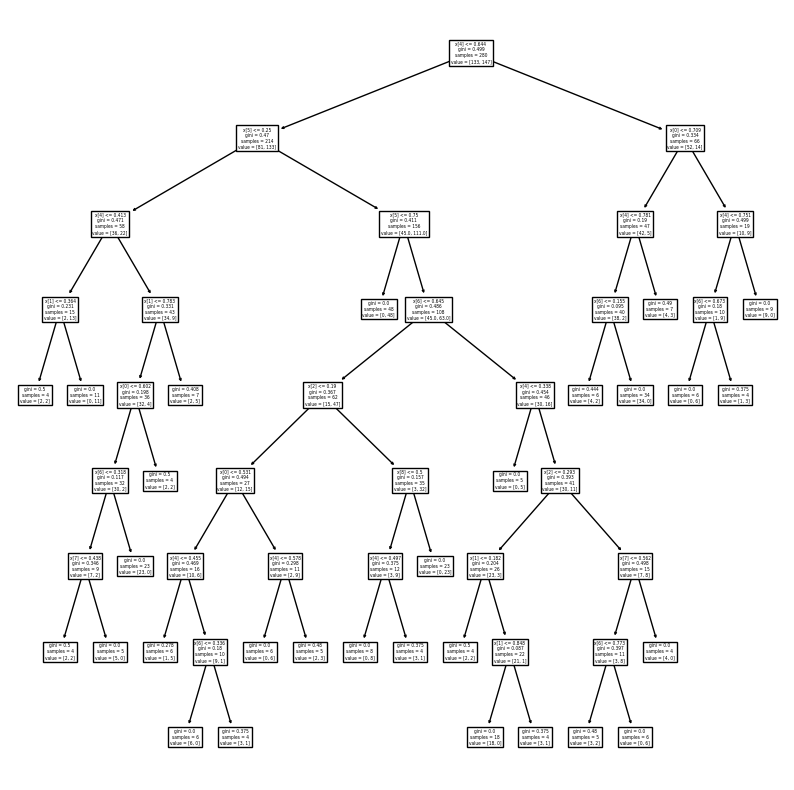

In [46]:
from sklearn import tree
plt.figure(figsize=(10,10))
model_L = DecisionTreeClassifier(criterion = 'gini',max_depth=80,min_samples_leaf=4, min_samples_split=5)
tree.plot_tree(model_L.fit(x_train,y_train));

In [47]:
pred_L= model_L.predict(x_test)
model_L.score(x_test,y_test)

0.7333333333333333